# Distribusi Peluang Kontinu

Distribusi peluang kontinu adalah sebuah tabel atau rumus yang mencantumkan semua kemungkinan nilai suatu variabel acak kontinu berikut peluangnya.

Terdapat beberapa macam distribusi peluang kontinu, yaitu:

## A. DISTRIBUSI NORMAL

Distribusi peluang kontinu yang paling penting dalam bidang statistika
adalah distribusi normal. Grafiknya yang disebut kurva normal adalah kurva
yang berbentuk genta seerti pada Gambar 6.1, yang dapat digunakan dalam
banyak sekali sekumpulan data yang terjadi di alam, industri, dan penelitian.
Pada tahun 1733, DeMoivre telah berhasil menurunkan persamaan
matematika bagi kurva normal ini. Distribusi normal sering disebut distribusi
Gauss, untuk menghormati Gauss (1777-1855), yang juga berhasil
mendapatkan persamaannya dari studi mengenai galat dalam pengukuran
yang berulang-ulang terhadap benda yang sama.

Rumus dari distribusi normal:

$$ \large
f(x|\mu, \sigma^2)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}
$$
dimana,
- $\mu$ adalah **mean** dari distribusi;
- $\sigma^2$ adalah **variansi**;
- $\sigma$ adalah **standar deviasi**.

In [33]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from IPython.display import display, HTML

import numpy as np
import pandas as pd

In [46]:
from scipy.stats import norm

# Parameters
x = 1.3 # nilai yang harus dicari
mu = 0 # mean
sigma = 1 # standar deviasi

print("Mean: ", norm.mean(loc = mu, scale = sigma))
print("Variance: ", norm.var(loc = mu, scale = sigma)) 
print("Probability mass function: ", norm.pdf(x, loc = mu, scale = sigma))
print("Cumulative distribution function: ", norm.cdf(x, loc = mu, scale = sigma))
print("Survival function (1-cdf): ", norm.sf(x, loc = mu, scale = sigma))


Mean:  0.0
Variance:  1.0
Probability mass function:  0.17136859204780736
Cumulative distribution function:  0.9031995154143897
Survival function (1-cdf):  0.09680048458561036


In [34]:
np.seterr(divide='ignore')
plt.rcParams['figure.figsize'] = (16, 8)

In [35]:
def distribusiNormal(x, mu, sigma):
    return 1/(sigma*(2*np.pi)**0.5)*np.exp(-1/2*((x - mu)/sigma)**2)

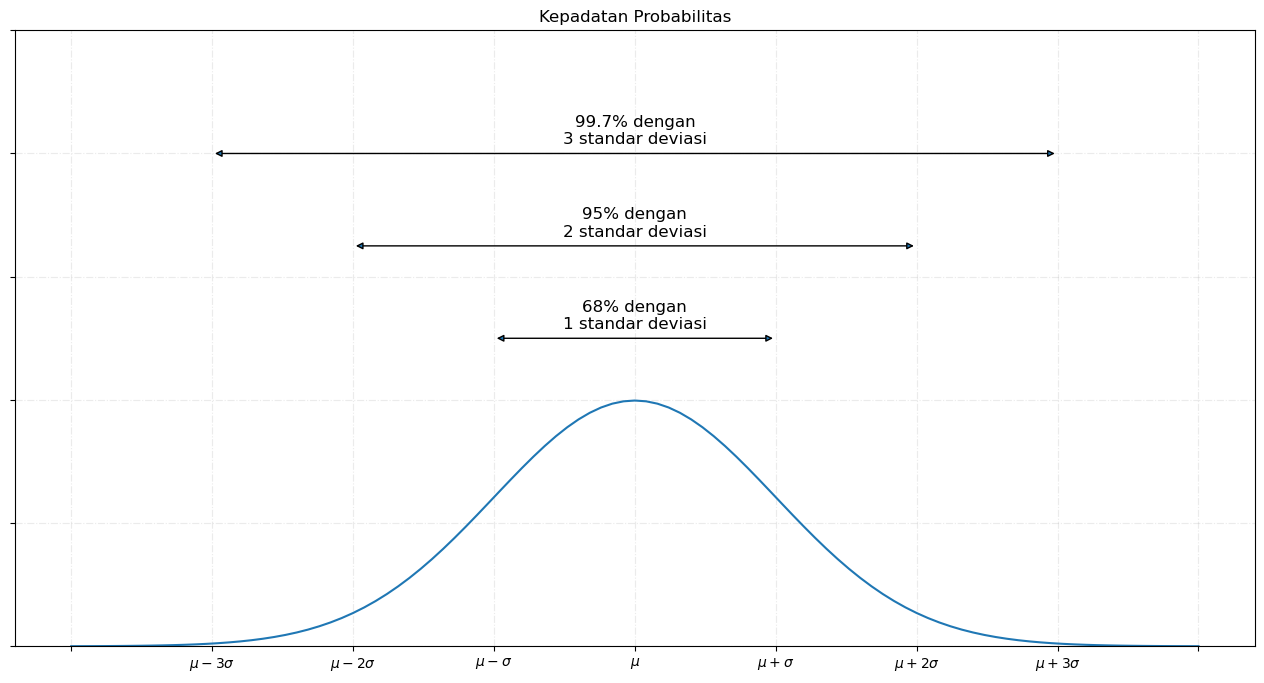

In [36]:
x = np.linspace(-4, 4, 101)
p = distribusiNormal(x, 0, 1)

plt.plot(x, p)
plt.ylim(0, 1)

plt.annotate(
    "",
    xy=(-1, 0.5), xycoords='data',
    xytext=(1, 0.5), textcoords='data',
    arrowprops=dict(arrowstyle="<|-|>")
)
plt.text(0, 0.51, '68% dengan\n1 standar deviasi', ha='center', va='bottom', size=12)

plt.annotate(
    "",
    xy=(-2, 0.65), xycoords='data',
    xytext=(2, 0.65), textcoords='data',
    arrowprops=dict(arrowstyle="<|-|>")
)
plt.text(0, 0.66, '95% dengan\n2 standar deviasi', ha='center', va='bottom', size=12)

plt.annotate(
    "",
    xy=(-3, 0.8), xycoords='data',
    xytext=(3, 0.8), textcoords='data',
    arrowprops=dict(arrowstyle="<|-|>")
)
plt.text(0, 0.81, '99.7% dengan\n3 standar deviasi', ha='center', va='bottom', size=12)

plt.grid(alpha=0.25, linestyle='-.')
plt.xticks(
    range(-4, 5), 
    [
        '', r'$\mu-3\sigma$', r'$\mu-2\sigma$', 
        r'$\mu-\sigma$', r'$\mu$', r'$\mu+\sigma$', 
        r'$\mu+2\sigma$', r'$\mu+3\sigma$', ''
    ]
)
plt.yticks(np.linspace(0, 1, 6), ['']*6)
plt.title('Kepadatan Probabilitas')
plt.show()

## Standard normal distribution
---
Suatu distribusi dikatakan normal apabila sesuai dengan karakteristik
distribusi yang secara teoritis diturunkan dari apa yang disebut sebagai
distribusi normal standar. Distribusi ini mempunyai nilai rata-rata 0 dan
varians 1. $\mu=0$ and $\sigma=1$

Rumusnya adalah

$$ \large
f(x)=\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}x^2}
$$

### Perhitungan Probabilitas untuk Distribusi Normal Umum

- $X \sim N(\mu, \sigma^2) \Longrightarrow Z = \frac{X - \mu}{\sigma} \sim N(0,1)$
- So, $P(a \leq X \leq b) = P \left( \frac{ a - \mu}{ \sigma} \leq \frac{ X - \mu}{ \sigma} \leq \frac{ b - \mu}{ \sigma} \right) = P \left( \frac{ a - \mu}{ \sigma} \leq Z \leq \frac{ b - \mu}{ \sigma} \right) = \Phi \left(\frac{ b - \mu}{ \sigma} \right) - \Phi \left( \frac{a - \mu}{ \sigma} \right)$
- Properti lainnya:
    - $P( \mu -c \sigma \leq X \leq \mu + c \sigma) = P(-c \leq Z \leq c)$
    - $P(X \leq \mu + \sigma z_{\alpha}) = P(Z \leq z_ {\alpha}) = 1 - \alpha$

In [48]:
# Kali ini kita menghitung distribusi menggunakan distribusi normal baku, yaitu dengan menghitung variabel baru Z
# Hasil yang sama seperti pada pendekatan sebelumnya. Metode ini disarankan untuk perhitungan manual sekalipun
from scipy.stats import norm

# Parameters 
x = 1300 # nilai yang harus dicari
mu = 1320 # mean
sigma = 15 # standar deviasi
# Opsional
alpha = 0.8 # nilai cdf digunakan dalam ppf untuk menghitung kebalikan dari fungsi kepadatan probabilitas

# Transformasi parameter
Z = (x - mu)/sigma


print("Mean: ", mu) # rata-rata diberikan
print("Variansi: ", sigma**2) # menghitung varians menggunakan standar deviasi yang disediakan
print("Probability mass function: ", norm.pdf(Z))
print("Cumulative distribution function: ", norm.cdf(Z))
print("Survival function (1-cdf): ", norm.sf(Z))
print("Percent point function (inverse of cdf): ", norm.ppf(alpha))
print("Inverse survival function (inverse of (1-cdf)): ", norm.isf(alpha)) # Berguna untuk menemukan nilai kritis

Mean:  1320
Variansi:  225
Probability mass function:  0.16401007467599366
Cumulative distribution function:  0.09121121972586788
Survival function (1-cdf):  0.9087887802741321
Percent point function (inverse of cdf):  0.8416212335729143
Inverse survival function (inverse of (1-cdf)):  -0.8416212335729143


In [37]:
def stdDistribusiNormal(x):
    return distribusiNormal(x, 0, 1)

## Fungsi Distribusi Kumulatif
---
$$ \large
\Phi(z)=\frac{1}{2\pi}\int_{-\infty}^{z}e^{-\frac{t^2}{2}}dx
$$
Untuk jangkauan $[-\infty, \infty]$ nilai dari $\Phi$ seharusnya $1$.

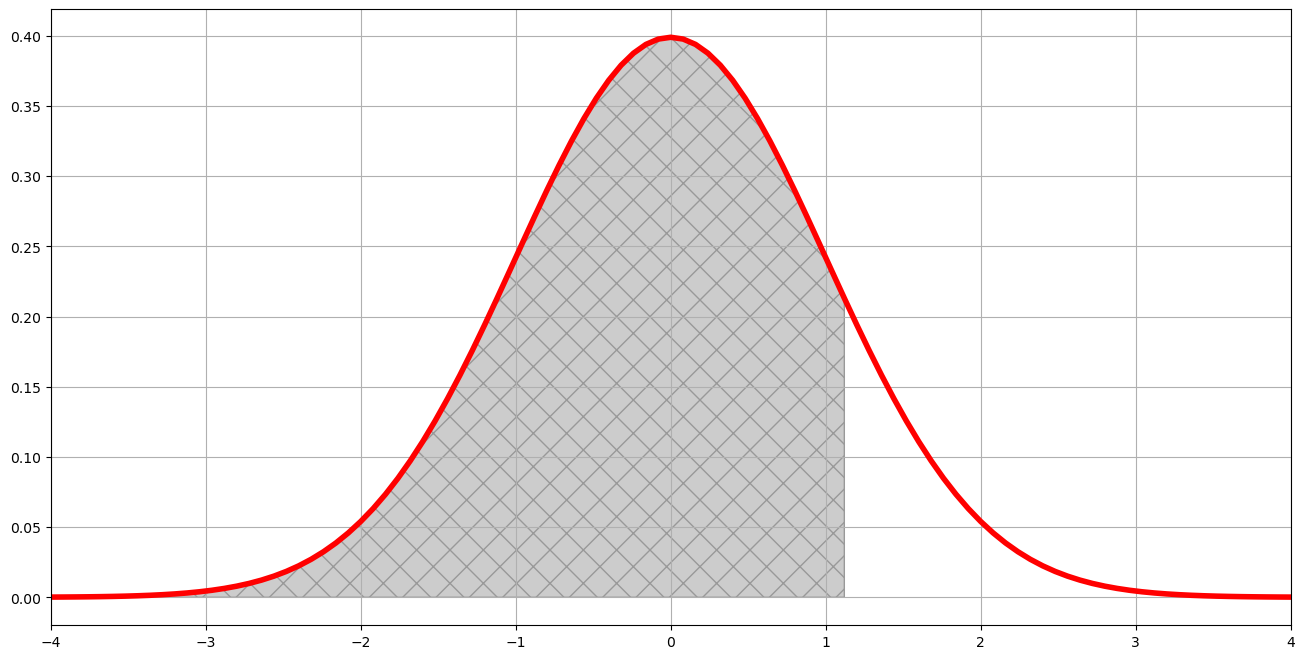

In [44]:
fig, ax = plt.subplots()

plt.plot(x, p, c='red', linewidth=4)
x1 = x[:65]; y1 = p[:65]
verts = [(x1[0], 0), *zip(x1, y1), (x1[-1], 0)]
P = Polygon(verts, facecolor='0.8', edgecolor='0.6', hatch='x')
ax.add_patch(P)
plt.xlim([-4, 4])
plt.grid()
plt.show()

## Kumulatif dari rata-rata
---
$$ \large
f(z)=\frac{1}{2\pi}\int_{0}^{z}e^{-\frac{t^2}{2}}dx
$$
Probabilitas dari 0 sampai Z, atau:
$$ \large
f(z)=\Phi(z) - \frac{1}{2}
$$

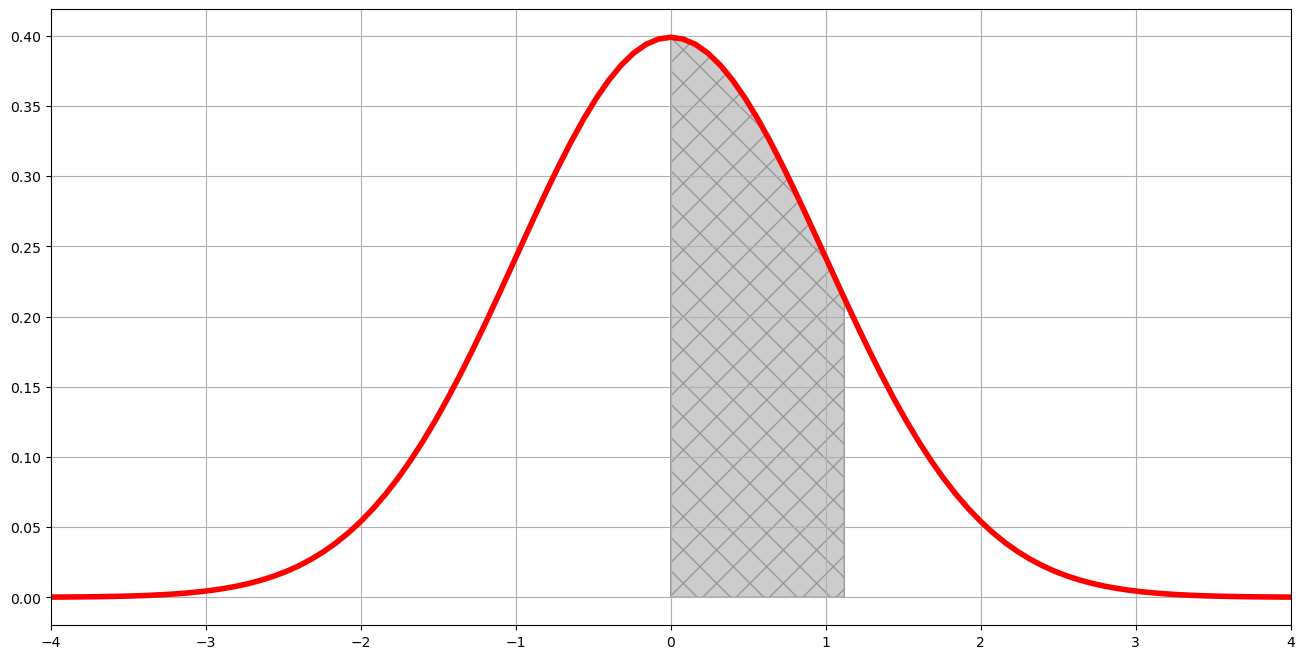

In [39]:
fig, ax = plt.subplots()

plt.plot(x, p, c='red', linewidth=4)
x1 = x[50:65]; y1 = p[50:65]
verts = [(x1[0], 0), *zip(x1, y1), (x1[-1], 0)]
P = Polygon(verts, facecolor='0.8', edgecolor='0.6', hatch='x')
ax.add_patch(P)
plt.xlim([-4, 4])
plt.grid()
plt.show()

## Z-Score
---

In [40]:
def definiteIntegral(f, a, b, N=10000):
    result = 0
    dx = abs(b - a)/N
    while a < b:
        result += f(a + dx/2)*dx
        a += dx
    return result

def zScore(z, option=0):
    '''
    Distribusi normal standar kumulatif
    Pilihan:
        0 => satu-ekor di bawah *default
        1 => satu sisi di atas
        2 => dua sisi di dalam
        3 => dua sisi di luar
    '''
    Z = abs(z)
    try:
        sign = z/abs(z)
    except ZeroDivisionError:
        return 0.0
    
    p = definiteIntegral(stdDistribusiNormal, 0, Z)

    if option == 1:
        return 0.5 - p*sign

    if option == 2:
        return 2*p

    if option == 3:
        return 1 - 2*p

    return 0.5 + p*sign

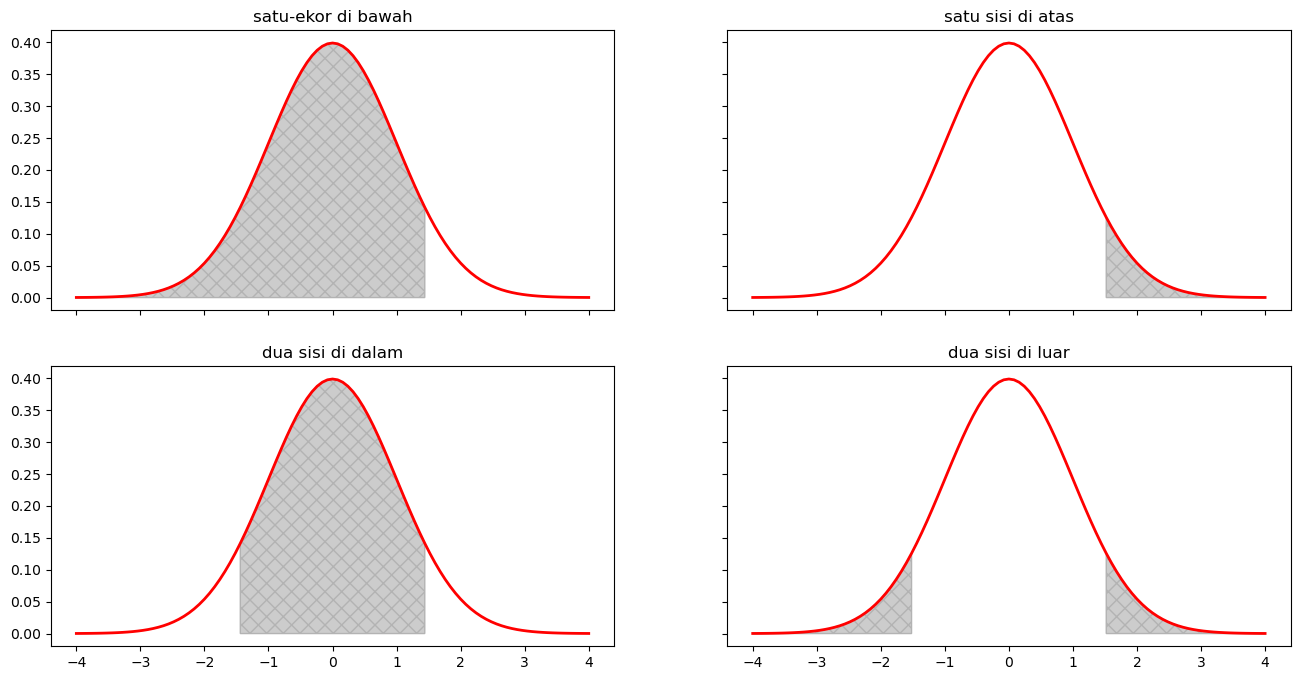

In [45]:
fig, [[axA, axB], [axC, axD]] = plt.subplots(2, 2, sharex='col', sharey='row')

axA.plot(x, p, c='red', linewidth=2)
slice = x <= 1.5
xP = x[slice]; yP = p[slice]
vertsP = [(xP[0], 0), *zip(xP, yP), (xP[-1], 0)]
PP = Polygon(vertsP, facecolor='0.8', edgecolor='0.7', hatch='xx')
axA.add_patch(PP)
axA.set_title('satu-ekor di bawah')

axB.plot(x, p, c='red', linewidth=2)
slice = x >= 1.5
xP = x[slice]; yP = p[slice]
vertsP = [(xP[0], 0), *zip(xP, yP), (xP[-1], 0)]
PP = Polygon(vertsP, facecolor='0.8', edgecolor='0.7', hatch='xx')
axB.add_patch(PP)
axB.set_title('satu sisi di atas')

axC.plot(x, p, c='red', linewidth=2)
slice = abs(x) <= 1.5
xP = x[slice]; yP = p[slice]
vertsP = [(xP[0], 0), *zip(xP, yP), (xP[-1], 0)]
PP = Polygon(vertsP, facecolor='0.8', edgecolor='0.7', hatch='xx')
axC.add_patch(PP)
axC.set_title('dua sisi di dalam')

axD.plot(x, p, c='red', linewidth=2)
slice = x >= 1.5
xP = x[slice]; yP = p[slice]
vertsP = [(xP[0], 0), *zip(xP, yP), (xP[-1], 0)]
PP = Polygon(vertsP, facecolor='0.8', edgecolor='0.7', hatch='xx')
axD.add_patch(PP)
slice = x <= -1.5
xP = x[slice]; yP = p[slice]
vertsP = [(xP[0], 0), *zip(xP, yP), (xP[-1], 0)]
PP = Polygon(vertsP, facecolor='0.8', edgecolor='0.7', hatch='xx')
axD.add_patch(PP)
axD.set_title('dua sisi di luar')

plt.show()

## TABEL NORMAL STANDAR

- Tabel untuk mendapatkan nilai $X$ yang diberikan $\Phi$. Kita juga bisa menghitung X dengan $ppf$ and $isf$
- Diketahui $\Phi(X) = \alpha$:
    - Percentage point function: kebalikan dari CDF; mengembalikan nilai dari $X$ diberikan
\begin{equation}
    X = \text{ppf}(\alpha) = \Phi ^{-1} (\alpha)
\end{equation}
    - Inverse survival function: kebalikan dari survival function (1-CDF); mengembalikan nilai dari $X$ diberikan
\begin{equation}
    X = \text{isf}(\alpha) = \Phi ^{-1} (1 - \alpha)
\end{equation}
    

In [50]:
alpha = 0.8 # nilai cdf digunakan dalam ppf untuk menghitung kebalikan dari probabilitas; sama dengan menggunakan tabel normal standar

from scipy.stats import norm

print("Percent point function (kebalikan dari cdf): ", norm.ppf(alpha))
print("Kebalikan survival function (kebalikan dari (1-cdf)): ", norm.isf(alpha)) # Berguna untuk menemukan nilai kritis

Percent point function (kebalikan dari cdf):  0.8416212335729143
Kebalikan survival function (kebalikan dari (1-cdf)):  -0.8416212335729143


Berikut adalah contoh tabel normal standar yang diambil sebagian dari
tabel yang sesungguhnya. Nilai-nilai $z$ dimulai dari 0,00 sampai 3,0

In [42]:
def zTable(option=0, digits=5, hsteps=0.01, zmin=-3.4, zmax=3.4):
    if option >= 2:
        zmin = 0.0 if zmin <= 0 else zmin
    steps = np.arange(zmin, zmax + 0.1, hsteps)
    steps = steps.reshape(-1, int(0.1/hsteps))
    df = pd.DataFrame(data=steps)
    d = int(np.ceil(abs(np.log10(hsteps))))
    cols = ['{0:.{1}f}'.format(e, d) for e in np.arange(0, 0.1, hsteps)]
    idxs = np.linspace(zmin, zmax, int((zmax - zmin)/0.1) + 1)
    df.index = idxs; df.columns = cols; ztable=df.rename_axis('+=>', axis=1)
    ztable = ztable.applymap(lambda x: round(zScore(x, option=option), digits))
    return ztable

In [43]:
# Display z table
ztable = zTable(zmin=1, zmax=3)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(ztable)

+=>,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
1.0,0.84137,0.84375,0.84614,0.84852,0.85085,0.85314,0.85543,0.85771,0.85995,0.86214
1.1,0.86433,0.86652,0.86867,0.87076,0.87288,0.87495,0.87698,0.87902,0.88102,0.88300
1.2,0.88495,0.88686,0.88879,0.89065,0.89251,0.89437,0.89617,0.89798,0.89975,0.90147
1.3,0.90322,0.90490,0.90658,0.90824,0.90988,0.91151,0.91311,0.91466,0.91623,0.91776
1.4,0.91924,0.92075,0.92220,0.92364,0.92509,0.92647,0.92788,0.92924,0.93056,0.93191
1.5,0.93319,0.93448,0.93576,0.93699,0.93824,0.93945,0.94062,0.94181,0.94295,0.94408
1.6,0.94522,0.94630,0.94740,0.94847,0.94950,0.95055,0.95154,0.95254,0.95354,0.95449
1.7,0.95543,0.95638,0.95728,0.95820,0.95909,0.95994,0.96081,0.96164,0.96246,0.96329
1.8,0.96407,0.96487,0.96563,0.96638,0.96713,0.96784,0.96856,0.96927,0.96995,0.97063
1.9,0.97130,0.97193,0.97258,0.97320,0.97381,0.97442,0.97500,0.97558,0.97616,0.97670


## Distribusi Eksponensial

Distribusi eksponensial sering disebut sebagai distribusi waktu.
Peristiwanya sangat erat dengan peristiwa pada distribusi Poisson. Saudara
perlu mengingat bahwa distribusi Poisson digunakan untuk menghitung
jumlah kejadian selama jangka waktu atau selang tertentu. Dalam banyak hal,
jangka waktu atau selang waktu dapat berupa variabel acak. Nah, variabel
acak yang berupa jangka waktu memiliki distribusi eksponensial. Misalnya,
dalam suatu antrian kapal yang berlabuh di suatu dermaga, jumlah
kedatangan kapal mengikuti distribusi Poisson, sedangkan waktu antara
kedatangan kapal mengikuti distribusi eksponensial.

- Distribusi eksponensial ($Exp( \lambda )$) lambda $\lambda$ yang dapat diartikan sebagai tingkat kejadian
- Arti dari distribusi eksponensial: sering menggambarkan jumlah waktu sebelum peristiwa tertentu terjadi
- Fungsi distribusi probabilitas:
\begin{equation}
    f(x; \lambda) = \lambda e ^ {- \lambda x} \text{ , } x > 0
\end{equation}
- Fungsi distribusi kumulatif:
\begin{equation}
    F(x) = 1 - e^{\lambda x}
\end{equation}
- $E(X) = \frac{1}{\lambda}$
- $Var(X) = \frac{1}{\lambda^2}$

In [30]:
from scipy.stats import expon

# Parameters
Lambda = 0.5 # lambda, occurrence rate
x = 1 # occurrence number

print("Mean: ", expon.mean(scale = Lambda))
print("Variance: ", expon.var(scale = Lambda))
print("Probability mass function: ", expon.pdf(x, scale = Lambda))
print("Cumulative distribution function: ", expon.cdf(x, scale = Lambda))
print("Survival function (1-cdf): ", expon.sf(x, scale = Lambda))

Mean:  0.5
Variance:  0.25
Probability mass function:  0.2706705664732254
Cumulative distribution function:  0.8646647167633873
Survival function (1-cdf):  0.1353352832366127
